In [22]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sqlalchemy import create_engine

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
    
query1='''
SELECT
    *
FROM
    heartdisease
'''
    
    
df = pd.read_sql_query(query1, con=engine)
engine.dispose()

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)
    
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?

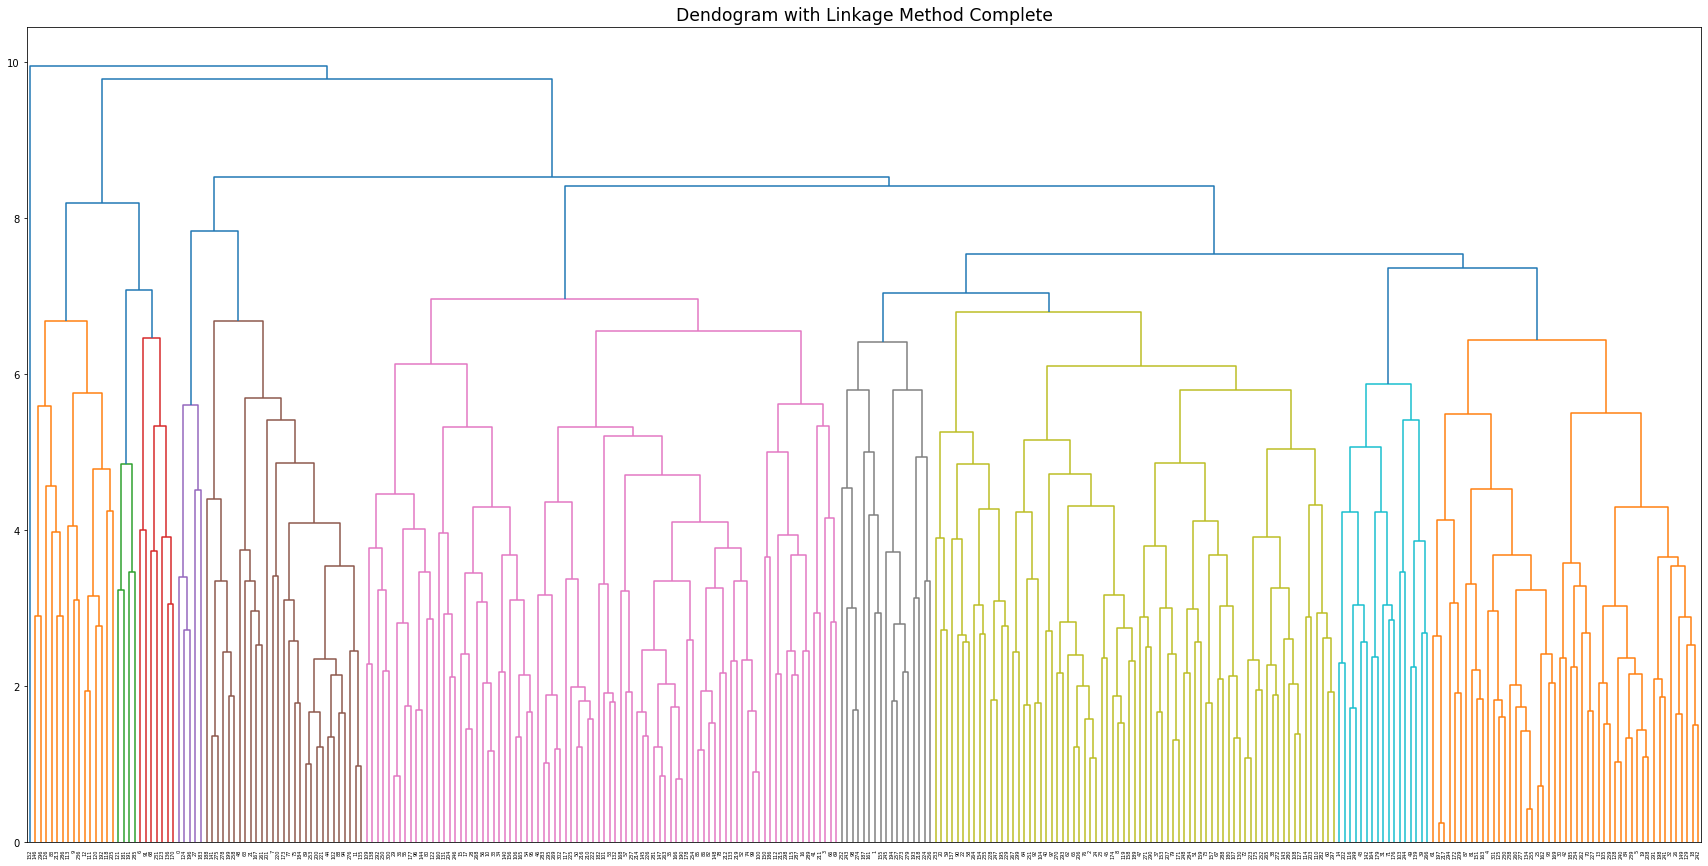

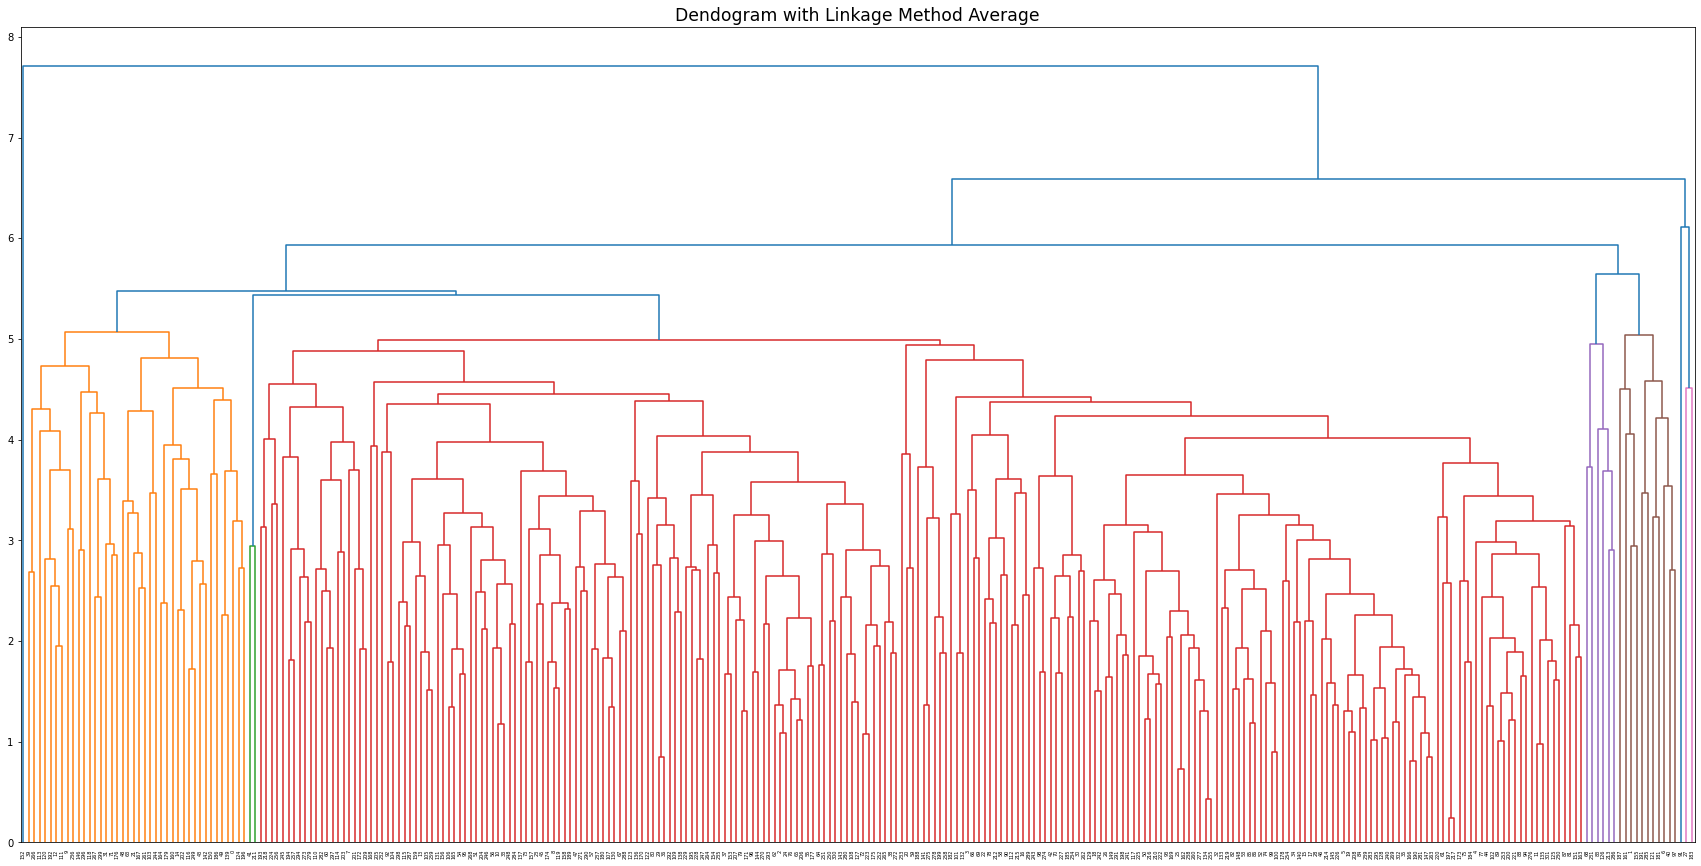

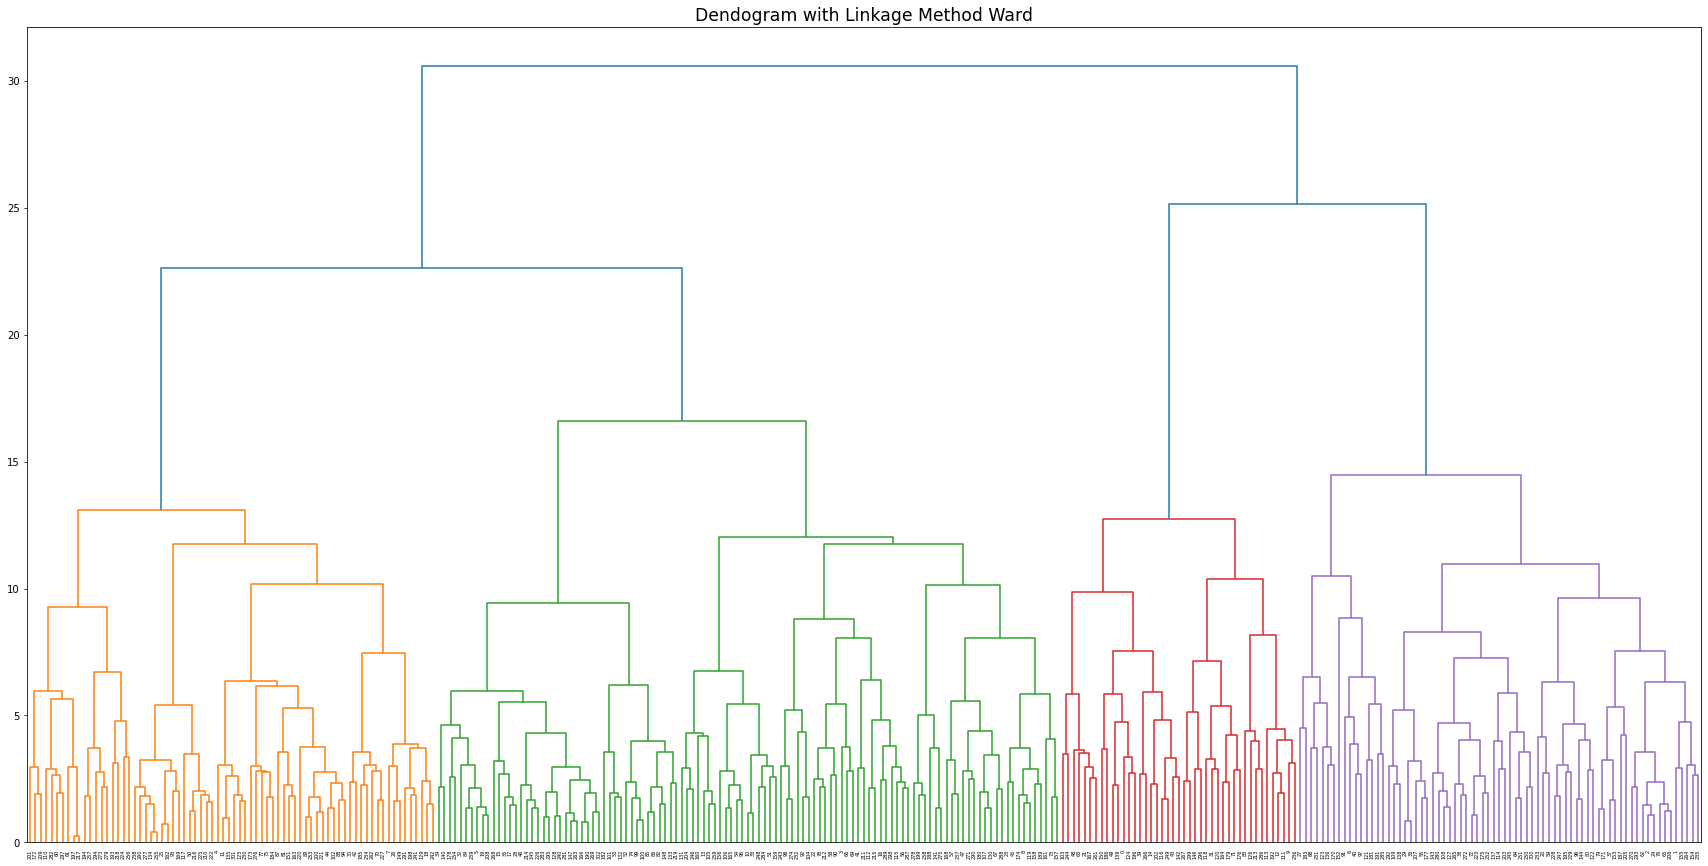

In [20]:
for method in linkages:
    plt.figure(figsize=(30,15))
    plt.title('Dendogram with Linkage Method {}'.format(method.capitalize())
              , size='xx-large')
    dendrogram(linkage(X_std, method=method))
    plt.show()

#### Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?

In [36]:
for method in linkages:
    if method == 'ward':
        aff ='euclidean'
        
    else:
        aff = 'cosine'
    #
    agg_cluster = AgglomerativeClustering(linkage=method, 
                                          affinity=aff,
                                          n_clusters=2)
    
    #
    pred = agg_cluster.fit_predict(X_std)
    
    
    
    sil = metrics.silhouette_score(X, pred, metric=aff)
    ari = metrics.adjusted_rand_score(y, pred)
    
    print(f'For method {method}:', '\n', '-'*20)
    print(f'Silhouette Score: {sil}', '\n')
    print(f'Adjusted Rand Index Score: {ari}', '\n')
    

For method complete: 
 --------------------
Silhouette Score: 0.14757655011795173 

Adjusted Rand Index Score: 0.21394030618551016 

For method average: 
 --------------------
Silhouette Score: 0.1939515481385304 

Adjusted Rand Index Score: 0.2940490133353465 

For method ward: 
 --------------------
Silhouette Score: 0.08678602813437505 

Adjusted Rand Index Score: 0.146129913123814 



KMeans is much better than any of these results. Average using cosine  produces the best results for both metrics.

In [35]:
method = 'average'
print(f'{method.capitalize()}', '\n')
for aff in ['euclidean', 'manhattan', 'cosine']:
    print(f'{aff}', '\n', '-'*20)
    agg_cluster = AgglomerativeClustering(linkage=method, 
                                          affinity=aff,
                                          n_clusters=2)
    # Fit the model 
    pred = agg_cluster.fit_predict(X_std)
    
    # Get metrics
    sil = metrics.silhouette_score(X, pred, metric=aff)
    ari = metrics.adjusted_rand_score(y, pred)

    # Report metrics
    print(f'Silhouette Score: {sil}', '\n')
    print(f'Adjusted Rand Index Score: {ari}', '\n\n', '-'*20)
    euclidean'

Average 

euclidean 
 --------------------
Silhouette Score: 0.7615389380511159 

Adjusted Rand Index Score: -0.0010061512759301477 

 --------------------
manhattan 
 --------------------
Silhouette Score: 0.6758862645668651 

Adjusted Rand Index Score: -0.0010061512759301477 

 --------------------
cosine 
 --------------------
Silhouette Score: 0.1939515481385304 

Adjusted Rand Index Score: 0.2940490133353465 

 --------------------


Even with a little tuning hierarchal clustering is not effective on this dataset.